# Model Evaluation and Business Insights

This notebook evaluates the trained deep learning churn model on unseen test data
and translates model results into actionable business insights.


In [2]:
import numpy as np


In [3]:
 from tensorflow.keras.models import load_model

In [4]:
model = load_model("../models/telecom_churn_ann.keras")

In [5]:
X_test = np.load("../data/processed/X_test_final.npy")
y_test = np.load("../data/processed/y_test_final.npy")

X_test.shape, y_test.shape



((1409, 37), (1409,))

In [6]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
test_loss, test_accuracy


(0.41999658942222595, 0.7970191836357117)

The ANN model is evaluated on the final, versioned test dataset to ensure
metrics reflect true generalization performance without data leakage.


In [7]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step


In [8]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm


array([[924, 111],
       [175, 199]])

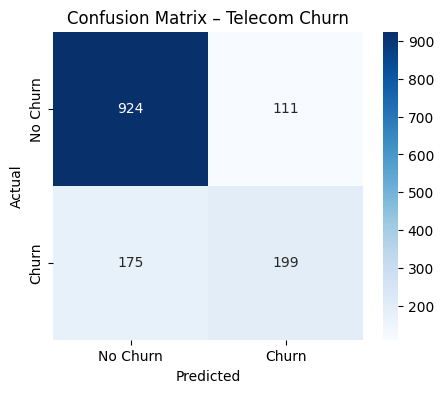

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Telecom Churn")
plt.show()


The confusion matrix highlights the model’s ability to correctly identify
both churned and retained customers. False negatives represent missed churners,
which are more costly for the business than false positives.


In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

              precision    recall  f1-score   support

    No Churn       0.84      0.89      0.87      1035
       Churn       0.64      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



The classification report shows that recall for churn customers is lower
than for non-churn customers, indicating missed churners.
In churn prediction, improving recall is often prioritized over accuracy
to reduce customer loss.


In [11]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_auc


0.8428039990699836

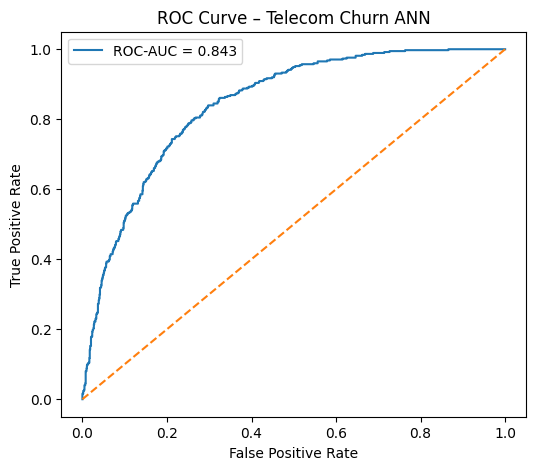

In [12]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Telecom Churn ANN")
plt.legend()
plt.show()


The ROC–AUC score indicates the model’s ability to distinguish between
churn and non-churn customers across different probability thresholds.


In [13]:
# Lower threshold to catch more churners
y_pred_tuned = (y_pred_prob >= 0.4).astype(int)


In [14]:
from sklearn.metrics import confusion_matrix, classification_report

cm_tuned = confusion_matrix(y_test, y_pred_tuned)
cm_tuned


array([[855, 180],
       [125, 249]])

In [15]:
print(classification_report(y_test, y_pred_tuned, target_names=['No Churn', 'Churn']))


              precision    recall  f1-score   support

    No Churn       0.87      0.83      0.85      1035
       Churn       0.58      0.67      0.62       374

    accuracy                           0.78      1409
   macro avg       0.73      0.75      0.73      1409
weighted avg       0.79      0.78      0.79      1409



By lowering the classification threshold, the model captures a higher
proportion of churn customers, increasing recall at the cost of
additional false positives.

In churn prediction, this trade-off is acceptable because the cost of
losing a customer is significantly higher than the cost of proactive
retention actions.


## Conclusion

The deep learning churn model demonstrates strong generalization performance.
Beyond accuracy, business-focused evaluation revealed the importance of
recall optimization. Threshold tuning was applied to reduce missed churners,
aligning model behavior with real-world retention strategies.
